In [41]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from math import sqrt
from datetime import datetime
%matplotlib inline

In [2]:
def DTWDistance(s1, s2,w):
    DTW={}
    
    w = max(w, abs(len(s1)-len(s2)))
    
    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0
  
    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return sqrt(DTW[len(s1)-1, len(s2)-1])

In [3]:
def LB_Keogh(s1,s2,r):
    LB_sum=0
    for ind,i in enumerate(s1):
        
        lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        
        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2
    
    return sqrt(LB_sum)

## Clustering 

In [94]:
import random

def k_means_clust(data,num_clust,num_iter,w=5):
    #assign random data points as starting centroids
    centroids=random.sample(data,num_clust)
    counter=0
    #min cluster sum
    min_total_cluster_distance = float('inf')
    for n in range(num_iter):
        counter+=1
        print counter
        assignments={}
        #assign data points to clusters
        for ind,i in enumerate(data):
            min_dist=float('inf')
            closest_clust=None
            for c_ind,j in enumerate(centroids):
                if LB_Keogh(i,j,5)<min_dist:
                    cur_dist=DTWDistance(i,j,w)
                    if cur_dist<min_dist:
                        min_dist=cur_dist
                        closest_clust=c_ind
            if closest_clust in assignments:
                assignments[closest_clust].append(ind)
            else:
                assignments[closest_clust]=[]
        
        #recalculate centroids of clusters
        temp_cluster_sum = 0
        for key in assignments:
            print "key:", key, "  "
            clust_sum=0
            for k in assignments[key]:
                clust_sum=clust_sum+data[k]
            centroids[key]=[m/len(assignments[key]) for m in clust_sum]
            print sum(clust_sum)
            temp_cluster_sum += sum(clust_sum)
        
        if temp_cluster_sum < min_total_cluster_distance:
            min_total_cluster_distance = temp_cluster_sum
            
    return (assignments, centroids, min_total_cluster_distance)

In [96]:
df = pd.read_csv("TS_NCFAS.csv", index_col="Subject Unique Identifier")

In [97]:
print len(df)
data = df.fillna(0).as_matrix()

64


1
key: 0   
1204.0
key: 1   
822.0
key: 2   
1321.0
2
key: 0   
1018.0
key: 1   
1561.0
key: 2   
768.0
3
key: 0   
626.0
key: 1   
1335.0
key: 2   
1386.0
4
key: 0   
645.0
key: 1   
1242.0
key: 2   
1460.0
5
key: 0   
709.0
key: 1   
1346.0
key: 2   
1292.0
6
key: 0   
626.0
key: 1   
1598.0
key: 2   
1187.0
7
key: 0   
645.0
key: 1   
1557.0
key: 2   
1145.0
8
key: 0   
626.0
key: 1   
1653.0
key: 2   
1068.0
9
key: 0   
538.0
key: 1   
1517.0
key: 2   
1292.0
10
key: 0   
538.0
key: 1   
1653.0
key: 2   
1156.0


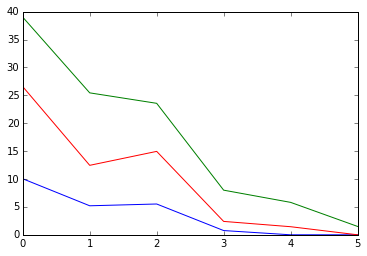

In [98]:
assignments, centroids, min_dist=k_means_clust(data,3,10,3)
for i in centroids:
    plt.plot(i)

plt.show()

In [99]:
df0 = df.iloc[assignments[0]]
df1 = df.iloc[assignments[1]]
df2 = df.iloc[assignments[2]]

df0["cluster"] = 0
df1["cluster"] = 1
df2["cluster"] = 2

df = df0.append(df1.append(df2))

/Users/acchi369/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/acchi369/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3347.0


/Users/acchi369/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [42]:
df.to_csv(datetime.now().strftime("cluster_results_%H_%M_%d_%m_%Y.csv"))

## Clustering with only Baseline, 3 Mo, 6 Mo

In [103]:
df_6mo = pd.read_csv("TS_NCFAS_6_Months_Only.csv", index_col="Subject Unique Identifier")

In [104]:
print len(df_6mo)
data_6mo = df_6mo.fillna(0).as_matrix()

32


1
key: 0   
944
key: 1   
599
key: 2   
542
2
key: 0   
1040
key: 1   
581
key: 2   
464
3
key: 0   
1040
key: 1   
691
key: 2   
354
4
key: 0   
1040
key: 1   
691
key: 2   
354
5
key: 0   
1040
key: 1   
691
key: 2   
354
6
key: 0   
1040
key: 1   
691
key: 2   
354
7
key: 0   
1040
key: 1   
691
key: 2   
354
8
key: 0   
1040
key: 1   
691
key: 2   
354
9
key: 0   
1040
key: 1   
691
key: 2   
354
10
key: 0   
1040
key: 1   
691
key: 2   
354


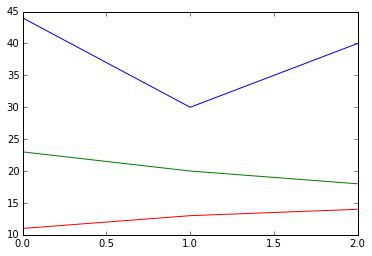

In [105]:
assignments_6mo, centroids_6mo, min_dist_6mo=k_means_clust(data_6mo,3,10,3)
for i in centroids_6mo:
    plt.plot(i)

plt.show()

In [106]:
df0_6mo = df_6mo.iloc[assignments_6mo[0]]
df1_6mo = df_6mo.iloc[assignments_6mo[1]]
df2_6mo = df_6mo.iloc[assignments_6mo[2]]

df0_6mo["cluster"] = 0
df1_6mo["cluster"] = 1
df2_6mo["cluster"] = 2

df_6mo = df0_6mo.append(df1_6mo.append(df2_6mo))

/Users/acchi369/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/acchi369/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2085


/Users/acchi369/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [58]:
df_6mo.to_csv(datetime.now().strftime("cluster_results_6mo_%H_%M_%d_%m_%Y.csv"))

## Clustering based on Difference in Score between Sessions

In [107]:
df_diff = pd.read_csv("TS_NCFAS_DIFF.csv", index_col="Subject Unique Identifier")

In [108]:
print len(df_diff)
data_diff = df_diff.fillna(0).as_matrix()

64


1
key: 0   
-35
key: 1   
150
key: 2   
-149
2
key: 0   
-35
key: 1   
117
key: 2   
-95
3
key: 0   
-35
key: 1   
138
key: 2   
-105
4
key: 0   
-35
key: 1   
117
key: 2   
-95
5
key: 0   
-35
key: 1   
138
key: 2   
-105
6
key: 0   
-35
key: 1   
117
key: 2   
-95
7
key: 0   
-35
key: 1   
138
key: 2   
-105
8
key: 0   
-35
key: 1   
117
key: 2   
-95
9
key: 0   
-35
key: 1   
138
key: 2   
-105
10
key: 0   
-35
key: 1   
117
key: 2   
-95


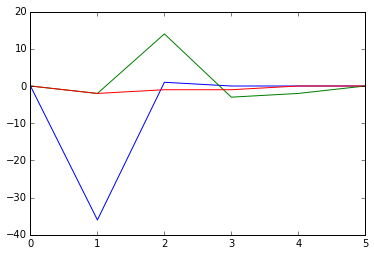

In [109]:
assignments_diff, centroids_diff, min_dist_diff=k_means_clust(data_diff,3,10,3)
for i in centroids_diff:
    plt.plot(i)

plt.show()

In [87]:
df0_diff = df_diff.iloc[assignments_diff[0]]
df1_diff = df_diff.iloc[assignments_diff[1]]
df2_diff = df_diff.iloc[assignments_diff[2]]

df0_diff["cluster"] = 0
df1_diff["cluster"] = 1
df2_diff["cluster"] = 2

df_diff = df0_diff.append(df1_diff.append(df2_diff))

/Users/acchi369/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/acchi369/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


-35


/Users/acchi369/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [65]:
df_diff.to_csv(datetime.now().strftime("cluster_results_diff_%H_%M_%d_%m_%Y.csv"))

## Clustering based on Difference in Score between Sessions (baseline, 3mo, 6mo)

In [90]:
df_diff_6mo = pd.read_csv("TS_NCFAS_DIFF_6_Months_Only.csv", index_col="Subject Unique Identifier")

In [91]:
print len(df_diff_6mo)
data_diff_6mo = df_diff_6mo.fillna(0).as_matrix()

32


1
key: 0   
key: 1   
key: 2   
2
key: 0   
key: 1   
key: 2   
3
key: 0   
key: 1   
key: 2   
4
key: 0   
key: 1   
key: 2   
5
key: 0   
key: 1   
key: 2   
6
key: 0   
key: 1   
key: 2   
7
key: 0   
key: 1   
key: 2   
8
key: 0   
key: 1   
key: 2   
9
key: 0   
key: 1   
key: 2   
10
key: 0   
key: 1   
key: 2   


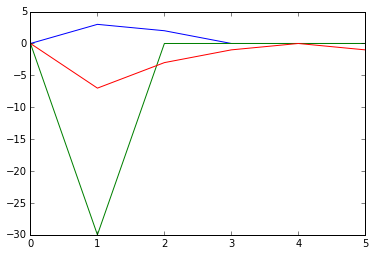

In [92]:
assignments_diff_6mo, centroids_diff_6mo, min_dist_diff_6mo=k_means_clust(data_diff_6mo,3,10,3)
for i in centroids_diff_6mo:
    plt.plot(i)

plt.show()

In [93]:
df0_diff_6mo = df_diff_6mo.iloc[assignments_diff_6mo[0]]
df1_diff_6mo = df_diff_6mo.iloc[assignments_diff_6mo[1]]
df2_diff_6mo = df_diff_6mo.iloc[assignments_diff_6mo[2]]

df0_diff_6mo["cluster"] = 0
df1_diff_6mo["cluster"] = 1
df2_diff_6mo["cluster"] = 2

df_diff_6mo = df0_diff_6mo.append(df1_diff_6mo.append(df2_diff_6mo))

/Users/acchi369/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/acchi369/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


-168


/Users/acchi369/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [70]:
df_diff_6mo.to_csv(datetime.now().strftime("cluster_results_diff_6mo%H_%M_%d_%m_%Y.csv"))